注：本文针对该比赛进行基础的EDA分析, 包括所有比赛都常看的统计值，数据集中单变量的分析, 造成单变量特定分布的背后含义的一些猜测与理解, 希望这篇文章能给很多刚刚步入数据挖掘竞赛的小伙伴们带来些许帮助,大家也可以借此简单的了解该比赛。


### 文章大纲：

1  赛题背景

    1.1  竞赛题目
    1.2  竞赛数据
        1.2.1  用户刷卡数据表（record_2019-01-xx.csv）
        1.2.2  路网地图（Metro_roadMap.csv）
        1.2.3  提交说明
    1.3  评估指标
    1.4  注意事项
    
2  工具包导入&数据读取

    2.1  工具包导入
    2.2  数据读取
3  数据EDA 

    3.1  基础EDA
        3.1.1  数据一览
        3.1.2  数据类型&大小
        3.1.3  数据缺失值探索
    3.2  单变量信息探索
        3.2.1  lineID
        3.2.2  payType
        3.2.3  status
        3.2.4  stationID
        3.2.5  deviceID
        3.2.6  time
        3.2.7  userID
    3.3  Metro_roadMap数据集分析
        3.3.1  中转站&终点站和始发站分析
4  小结

1  赛题背景

1.1  竞赛题目

    大赛以“地铁乘客流量预测”为赛题，参赛者可通过分析地铁站的历史刷卡数据，预测站点未来的客流量变化，帮助实现更合理的出行路线选择，规避交通堵塞，提前部署站点安保措施等，最终实现用大数据和人工智能等技术助力未来城市安全出行。
    
    大赛开放了20190101至20190125共25天地铁刷卡数据记录，共涉及3条线路81个地铁站约7000万条数据作为训练数据（Metro_train.zip），供选手搭建地铁站点乘客流量预测模型。训练数据（Metro_train.zip）解压后可以得到25个csv文件，每天的刷卡数据均单独存在一个csv文件中，以record为前缀。如2019年1月1日的所有线路所有站点的刷卡数据记录存储在record_2019-01-01.csv文件中，以此类推。同时大赛提供了路网地图，即各地铁站之间的连接关系表，存储在文件Metro_roadMap.csv文件中供选手使用。
    
    测试阶段，大赛将提供某天所有线路所有站点的刷卡数据记录，选手需预测未来一天00时至24时以10分钟为单位各时段各站点的进站和出站人次。
    预选赛阶段，测试集A集上，大赛将提供2019年1月28日的刷卡数据（testA_record_2019-01-28.csv），选手需对2019年1月29日全天各地铁站以10分钟为单位的人流量进行预测，淘汰赛和决赛将分别更新一批新的数据测试集B集和测试集C集。

### 2.1  工具包导入

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline

### 2.2  数据读取

In [6]:
path = "../input"
train = pd.read_csv(path+"/Metro_testA/testA_record_2019-01-28.csv")
test_A_submit = pd.read_csv(path+"/Metro_testA/testA_submit_2019-01-29.csv")

## 3  数据EDA
### 3.1  基础EDA
#### 3.1.1  数据一览

In [7]:
train.head()

,time,lineID,stationID,deviceID,status,userID,payType
0,2019-01-28 00:00:04,B,33,1587,0,Aad6ad59dfdd470bfdfdb0d2959db068b,0
1,2019-01-28 00:00:04,C,63,2933,0,Bab97d7b32891b8cb5451e80b73b23d70,1
2,2019-01-28 00:00:06,C,63,2934,0,Dda829d9f38d0a28f1e4ae84a34e846dc,3
3,2019-01-28 00:00:06,C,39,1839,0,Cc397069031ab762d75d613291cd68cda,2
4,2019-01-28 00:00:07,B,33,1588,0,Ba83c695d27b4d376bfde3f755e4b677f,1


### 3.1.2  数据类型&大小
* 每天的记录包含7种信息,4个int64类型的数据,3个object类型的数据;
* 每个数据集大概有128.4M左右的大小
* 数据集中一共有2404894个样本


In [8]:
train.shape

(2404894, 7)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404894 entries, 0 to 2404893
Data columns (total 7 columns):
time         object
lineID       object
stationID    int64
deviceID     int64
status       int64
userID       object
payType      int64
dtypes: int64(4), object(3)
memory usage: 128.4+ MB


### 3.1.3  数据缺失值探索

In [11]:
train.isnull().sum()

time         0
lineID       0
stationID    0
deviceID     0
status       0
userID       0
payType      0
dtype: int64

## 3.2  单变量信息探索
### 3.2.1  lineID

* 一共有3条线
* B线路乘坐的顾客数最多,A线路乘坐的人数最少

In [12]:
train["lineID"].nunique()

3

In [13]:
train["lineID"].value_counts()

B    1359943
C     787228
A     257723
Name: lineID, dtype: int64

### 3.2.2  payType

* 一共有4种不同的支付方式
* 类型为1的支付人数最多,3是变动的人数(也就是外地游客去购买的地铁卡),从下面来看还是当地人多一些

In [14]:
train["payType"].nunique()

4

In [15]:
train["payType"].value_counts()

1    994885
2    747733
0    346847
3    315429
Name: payType, dtype: int64

### 3.2.3  status

* status一共有两种情况,0(出站)和1(进站)
* 0要大于1,也就是说出站人数要大于进站的人数,比较符合常识,有些工作人员可能第二天才下班,所以需要注意这些工作人员的下班时间,也就是第二天凌晨的时间段等.这部分的预测可以单独处理.

In [16]:
train["status"].value_counts()

0    1202647
1    1202247
Name: status, dtype: int64

### 3.2.4  stationID

* stationID一共有80个不同的值
* stationID为15,9,7这些站点的人数比较多,可能是一些大型商业地点,例如南京的新街口等.
* stationID对应的人数不存在奇异的情况,例如0之类的,最少的也有7100多号人的流动。

In [18]:
train["stationID"].nunique()

80

In [19]:
train["stationID"].value_counts()

15    187465
9     106803
7      87161
4      72654
10     60455
11     55618
12     53390
8      51882
20     50828
33     46850
16     45592
5      45412
13     43792
14     42825
22     40963
56     40786
53     38822
46     37951
2      37336
47     37134
52     33926
55     33917
78     33585
76     33155
57     32834
49     32566
18     32194
77     30812
59     29563
58     28293
       ...  
60     19209
70     19146
19     18909
41     18792
65     18531
69     18480
44     18102
27     17974
23     17739
29     17128
34     16967
17     15054
32     15001
30     14418
71     13647
36     13502
67     13357
66     13306
1      12998
40     12565
21     11838
64     10681
79      9985
68      9958
80      9635
35      9083
72      8600
31      8567
28      7363
74      6852
Name: stationID, Length: 80, dtype: int64

### 3.2.6  time

* 我们先将时间转化为10分钟为单位
* 我们发现在凌晨的时候还零零散散的有人,可能是之前忘记出站的和工作人员的流动情况

In [20]:
train["time"] = pd.to_datetime(train["time"])
train["hour"] = train["time"].dt.hour
train["time_10minutes"] = train["time"].dt.hour * 6 + train["time"].dt.minute // 10
train["time_10minutes"].value_counts().sort_index()

0        215
1         88
2         66
3         22
4         19
5         18
6         22
7          7
8         18
9         27
10        12
11        10
12        14
13        14
14        19
15        10
16         9
17        10
18         9
19         6
21         3
22         2
23         2
24         7
25        24
26        14
27        43
28        27
29        15
30         5
       ...  
114    24163
115    23017
116    21673
117    19676
118    19404
119    18427
120    18588
121    18617
122    18262
123    18113
124    18723
125    18309
126    17905
127    17591
128    16597
129    15161
130    14665
131    13374
132    13074
133    12259
134    10594
135     9482
136     7767
137     5979
138     4489
139     3251
140     2164
141     1355
142      776
143      416
Name: time_10minutes, Length: 143, dtype: int64

* 我们发现早上7点,8点,9点的人数是最多的,因为这个时候很多人去上班了,所以算上班高峰期间.
* 下午6点的时候也有一波高峰,很明显,这个时候大家都下班了,所以人数会有突变.

In [21]:
train["hour"].value_counts().sort_index()

0        428
1         96
2         76
3         22
4        130
5       2865
6      40325
7     178077
8     314849
9     162814
10    123313
11    122542
12    122520
13    123684
14    122201
15    123799
16    132524
17    217642
18    213116
19    126360
20    110612
21     95293
22     59155
23     12451
Name: hour, dtype: int64

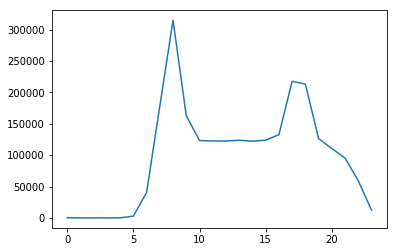

In [27]:
train["hour"].value_counts().sort_index().plot()

### 3.2.7  userID

* 有些userID很奇怪,有着非常高的出入频率,而有些userID却只有一次出入的情况,那些拥有很高的频率的应该是工作人员之类的.
* 还有很多userID的出现频率是1,

In [28]:
train["userID"].value_counts()

Dabe559cc687e70bd3487a1f12d6ee675    94
Da4534723f5a23b6a139496ac3676f553    72
D3532b0e8be5944efb9ba7b5dd7b2f2d6    60
D0703ec413b2dca1853f614dd6f96a08d    49
D215609a4b7c3ee82622a16b659ebbcd4    49
De3d8cd01c5b6b77062f18f2a3e35c362    49
D0aa66e54d67ba36f0470cce21c6a684f    48
D4ab72ff99052a1fc3ed0e3d5f47d3e5c    46
D46ff0cea4eef05da63cb7e2774dcb305    45
D35ed8633a8eb7169670289bc0a3a0154    43
D8af5372b98015beb66f8d1b5ed424a6b    38
D334ea26c5d77370f2b75d9a21ee237a5    36
Db46c6188aeb943c1e65eb8420e6a34e3    36
Dd279ac77ad98bc798d8d93b46acb4b81    35
D61ddc125cb0e0ecce4fa168b574e76bf    35
D2813683cbb5e7f1f3aea539f22d11cc8    34
D1a00421ffe7fb3f56a3825f5f73b70dd    34
D2195895d5188a874f5a98761fc73e1c7    34
Dc32fb1cd29105cc43c5d1f8a69145f26    34
C7ad902efad907997fdea03f2040c31ee    33
Daf0b953761c63ef8ed2633541999089d    32
D8263e149712315a597a977426f22be81    32
Dbd701c1cee3b60b8d974a24e6c87cc8d    32
Df706464584f801208ccb45fa36dfbfdc    32
D95c55470b85cfd1b9cb6243db5e21621    32


In [29]:
np.sum(train["userID"].value_counts()==1)

6269

### 3.3  Metro_roadMap数据集分析

* 因为官方额外给出了地铁地图的信息,所以我们对此进行简单的分析

In [31]:
Metro_roadMap = pd.read_csv(path+"/Metro_roadMap.csv")

In [32]:
Metro_roadMap.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,71,72,73,74,75,76,77,78,79,80
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.3.1  中转站&终点站和始发站分析

* 我们通过计算每个站点的连接度的读书,可以发现10,5,51这几站有很多点,这些点应该就是几个地铁线的换乘口
* 0,33,45,66,67,27这六个站应该就是始发站或者终点站,因为这些站只有一个连接口

In [35]:
lines = [str(i) for i in range(81)]
Metro_roadMap[lines].sum(axis=1).sort_values()

0     1
34    1
33    1
66    1
67    1
27    1
57    2
56    2
55    2
54    2
53    2
49    2
48    2
47    2
45    2
44    2
43    2
42    2
58    2
59    2
60    2
61    2
78    2
77    2
76    2
75    2
74    2
73    2
72    2
71    2
     ..
4     2
3     2
2     2
1     2
8     2
22    2
19    2
24    2
37    2
36    2
35    2
32    2
31    2
30    2
23    2
29    2
80    2
26    2
25    2
28    2
11    3
50    3
9     3
15    3
52    3
20    3
46    4
51    4
5     4
10    4
Length: 81, dtype: int64